In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import math
from score_matching import SM, keep_grad
from data_structures import MultivariateNormal2
import torch

In [11]:
%matplotlib widget
model = torch.load('outputs/density/29.pt')
model.eval()

x = y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
data = torch.Tensor(np.stack((np.ravel(X), np.ravel(Y)), axis=1))
zs = model(data).detach().numpy()
Z = zs.reshape(X.shape)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, np.exp(Z))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel(r'h(x|θ)')
plt.savefig('outputs/gaussian.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

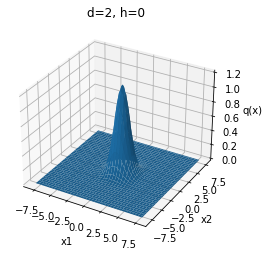

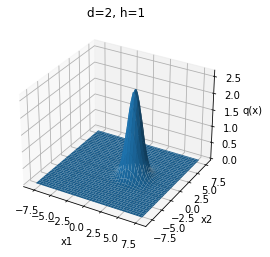

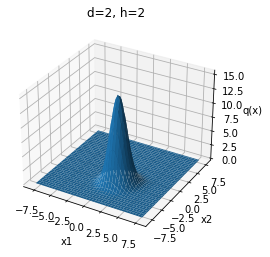

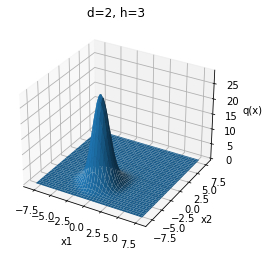

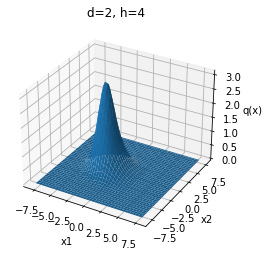

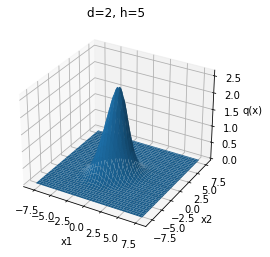

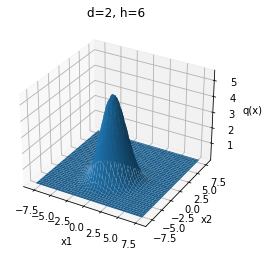

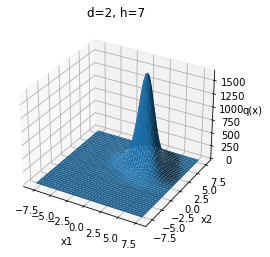

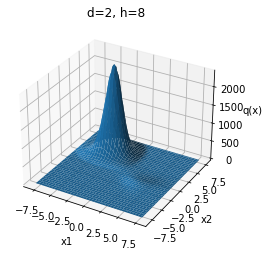

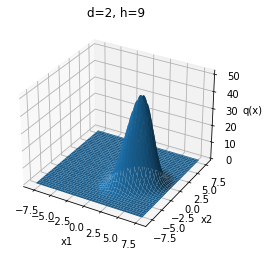

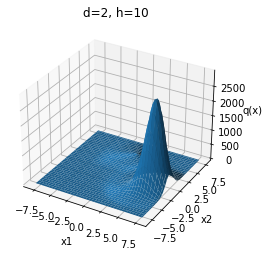

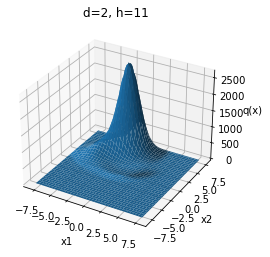

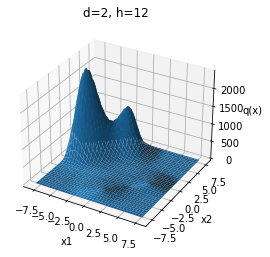

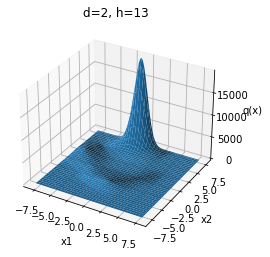

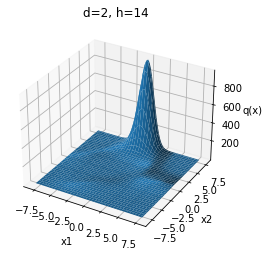

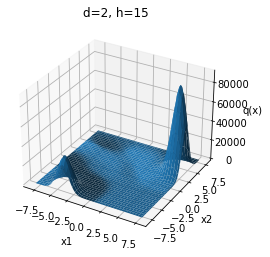

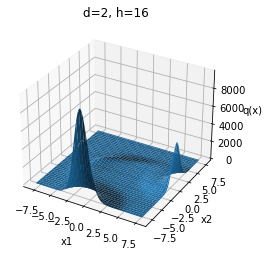

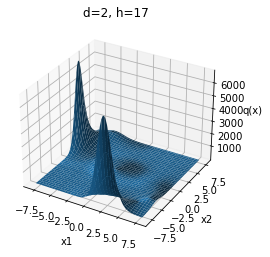

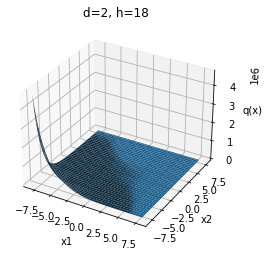

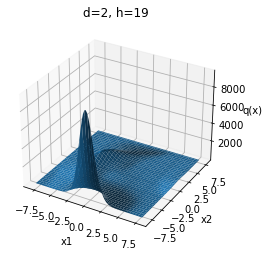

In [4]:
for i in range(20):
    model = torch.load(f'outputs/all_h/{i}.pt')
    model.eval()


    x = y = np.arange(-8, 8, 0.2)
    X, Y = np.meshgrid(x, y)
    data = torch.Tensor(np.stack((np.ravel(X), np.ravel(Y)), axis=1))
    zs = model(data).detach().numpy()
    Z = zs.reshape(X.shape)


    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, np.exp(Z))

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('q(x)')
    ax.set_title(f'd=2, h={i}')

    plt.savefig(f'outputs/all_h/{i}.png')


In [5]:
import imageio
images = [imageio.imread(f'outputs/all_h/{i}.png') for i in range(15)]
imageio.mimsave('outputs/all_h/all.gif', images, duration=0.5)